In [ ]:
!nvidia-smi

Mon May 27 14:51:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="OaF01bm2LBX5asqpx0m6")
# project = rf.workspace("berry-zykid").project("notch-detection-on-oven-buttons")
# version = project.version(1)
# dataset = version.download("yolov8")

# VERSION 2 - 417 images
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OaF01bm2LBX5asqpx0m6")
project = rf.workspace("berry-zykid").project("notch-detection-on-oven-buttons")
version = project.version(3)
dataset = version.download("yolov8")





loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True


100% 49.7M/49.7M [00:00<00:00, 371MB/s]
New https://pypi.org/project/ultralytics/8.2.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Notch-Detection-on-Oven-Buttons-3/data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Notch-Detection-on-Oven-Buttons-3/valid/labels.cache... 56 images, 1 backgrounds, 0 corrupt: 100% 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.33s/it]
                   all         56         55      0.913      0.759      0.868      0.404
Speed: 0.4ms preprocess, 57.4ms inference, 0.0ms loss, 11.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/28 /content/Notch-Detection-on-Oven-Buttons-3/test/images/03KYBAZ5G36O_button_1_png.rf.671430cebe37c4171ff7e80b3c099ed8.jpg: 800x800 (no detections), 63.3ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/28 /content/Notch-Detection-on-Oven-Buttons-3/test/images/03QCPN4ZBGA6_button_2_png.rf.f2a59558c252577137134ed223998f2d.jpg: 800x800 1 notches, 57.0ms
image 3/28 /content/Notch-Detection-on-Oven-Buttons-3/test/images/0YHXQISNXVGN_button_3_png.rf.0b40e823ca73130ec9adfe78fdb40a49.jpg: 800x800 1 notches, 56.9ms
image 4/28 /content/Notch-Detection-on-Oven-Buttons-3/test/images/1OPGT9WKJMNJ_button_2_png.rf.89024192cecac1076e1375c68036a055.jpg: 800x800 (no detections), 56.8ms
image 5/28 /content/Notch-Detection-on-Oven-Buttons-3/test/images/2559B8K247J5_button_2_png.rf.63e56cd8b3f52406ca9bcfcd17f82d14.jpg: 800x800

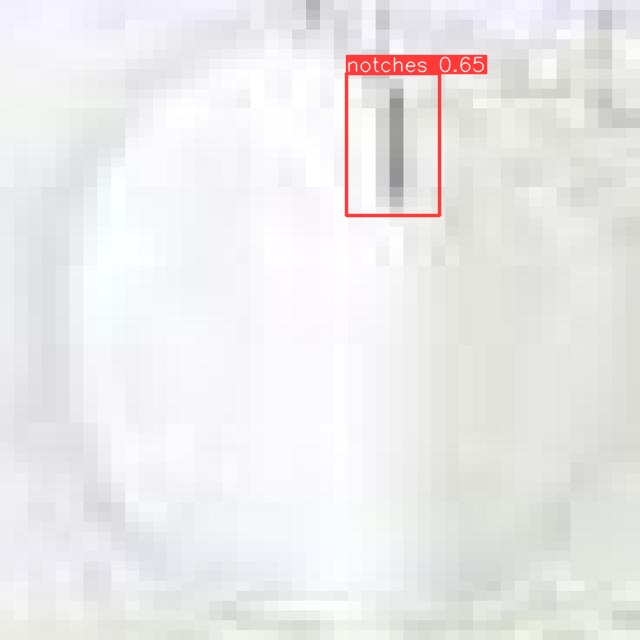

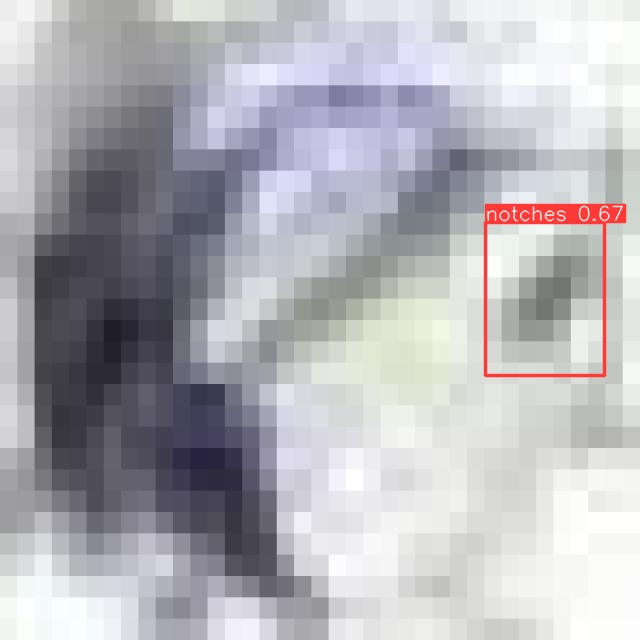

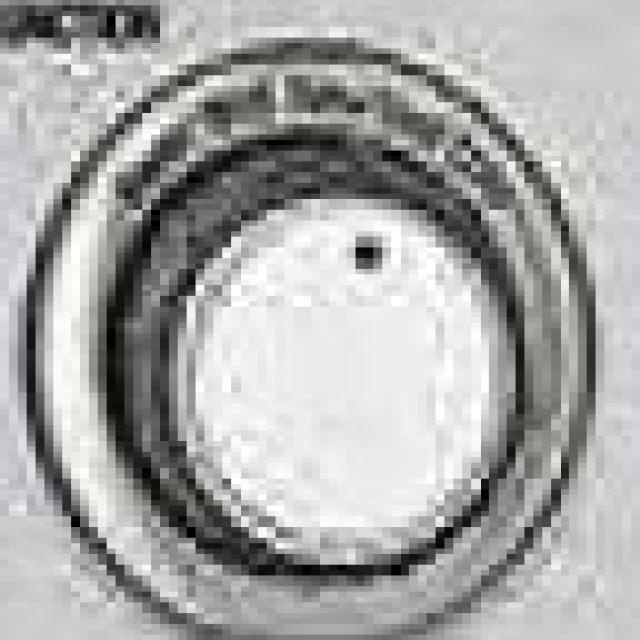

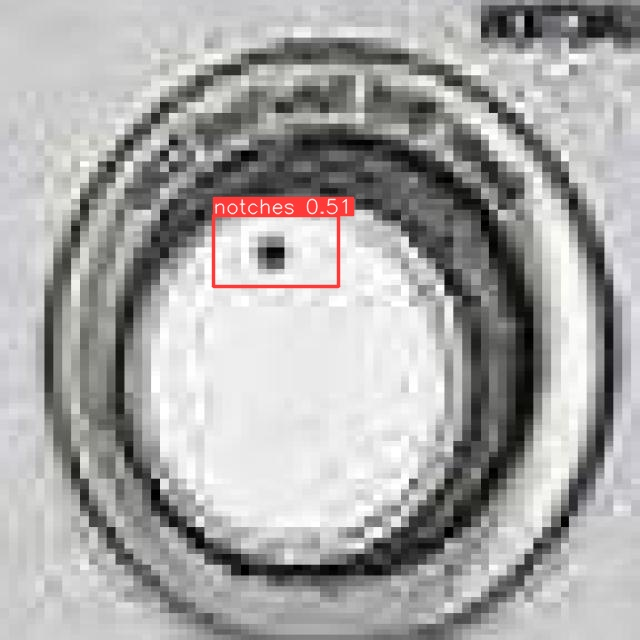

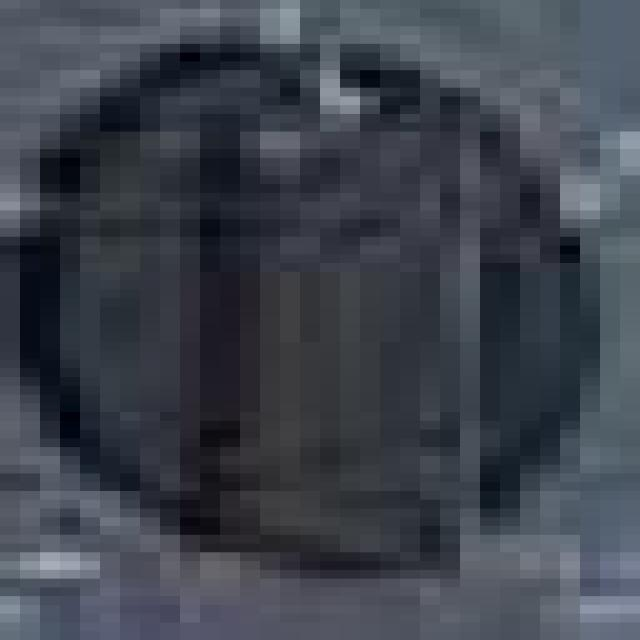

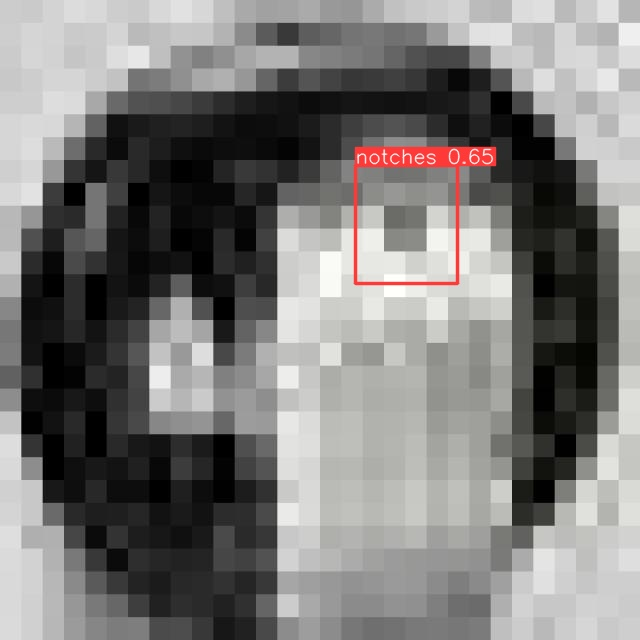

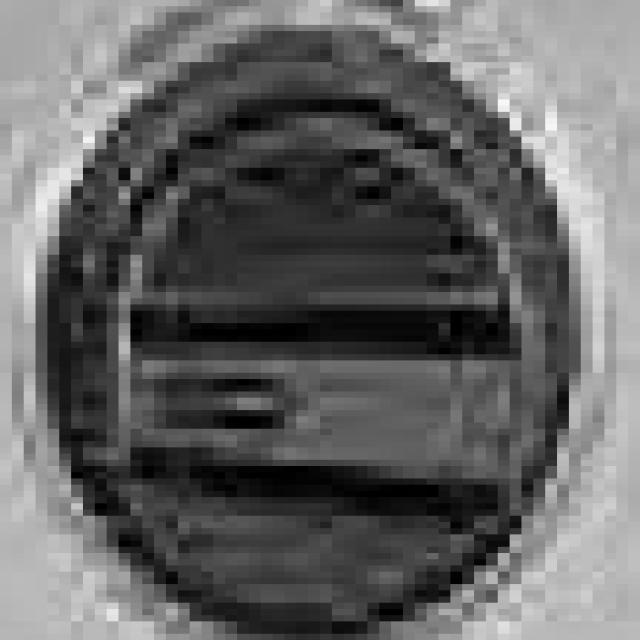

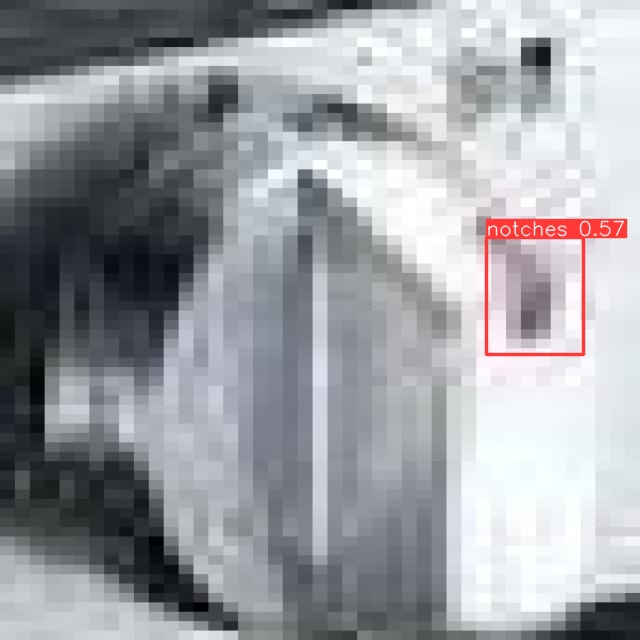

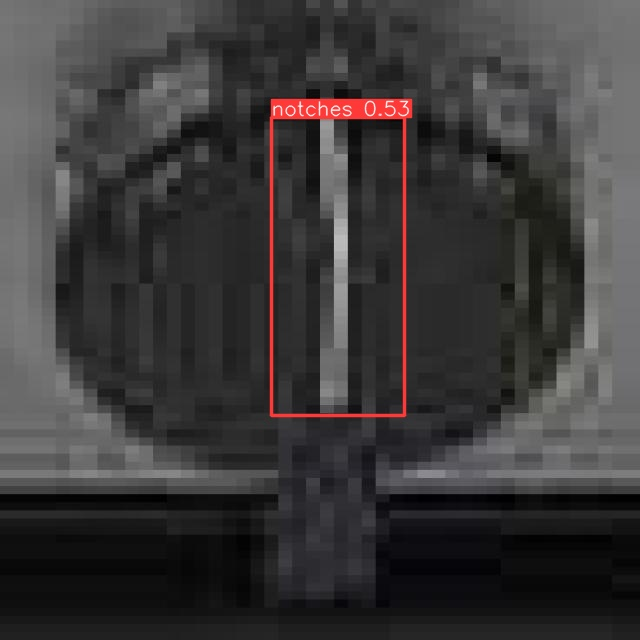

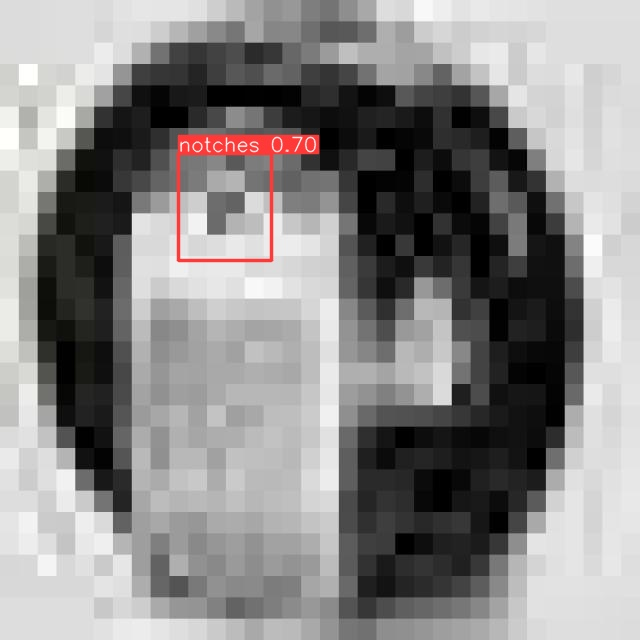

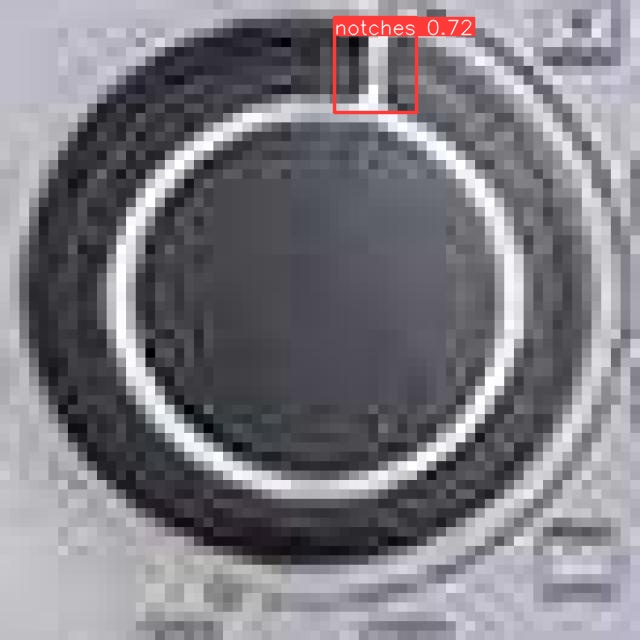

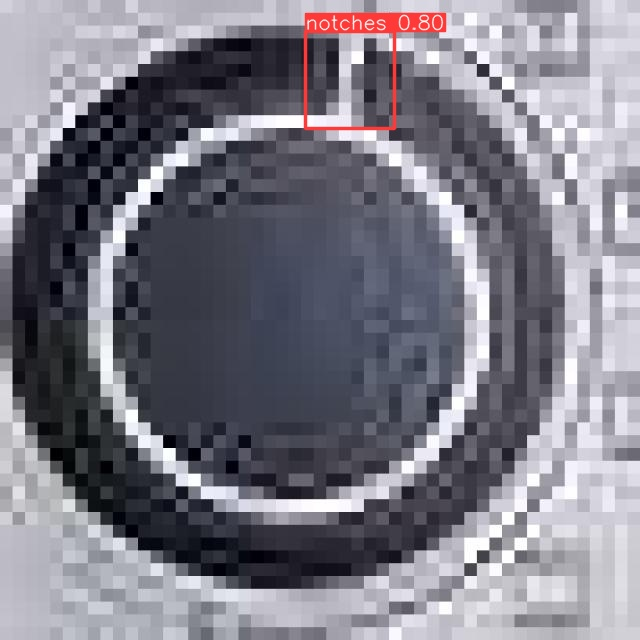

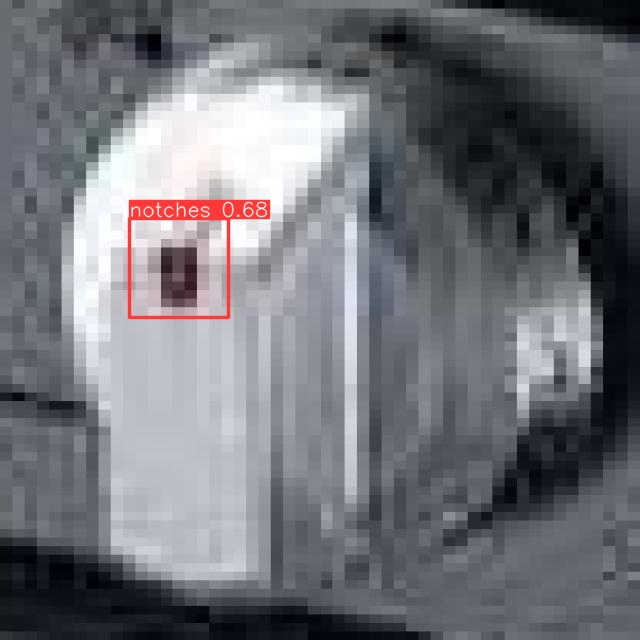

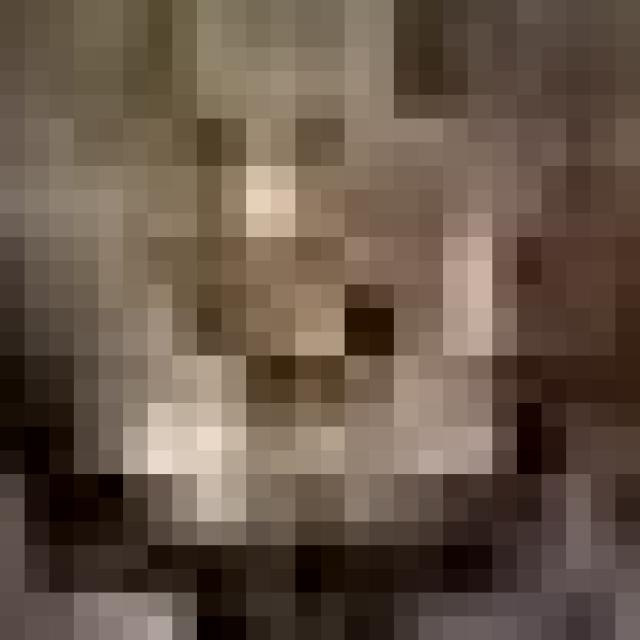

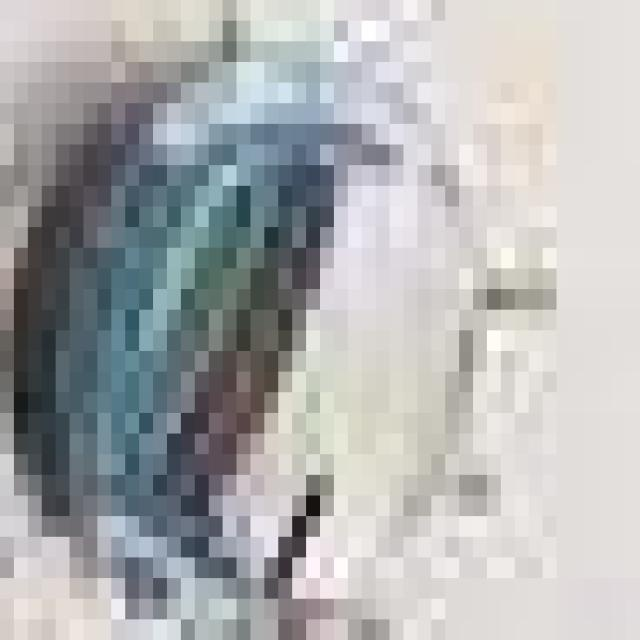

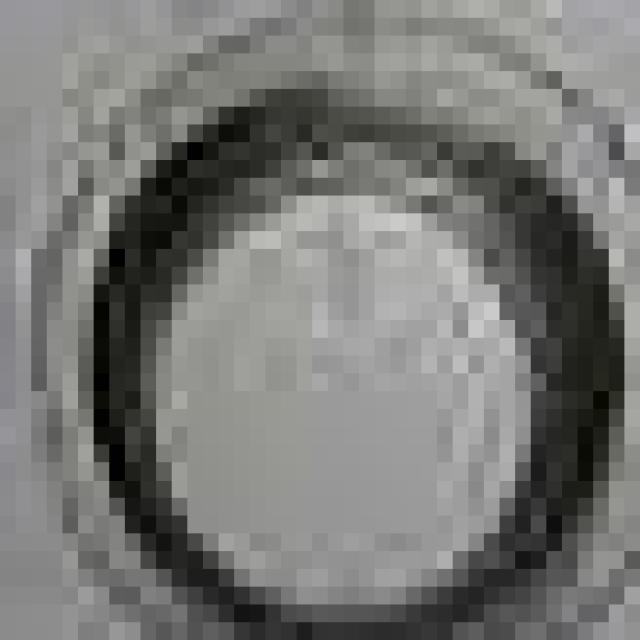

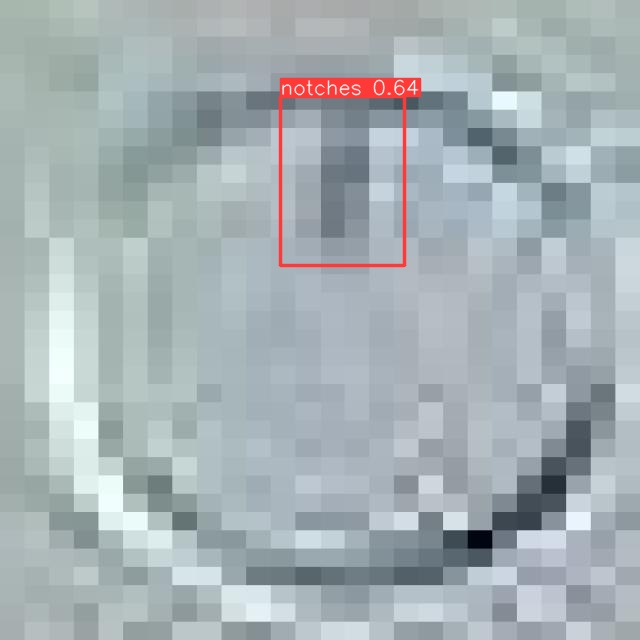

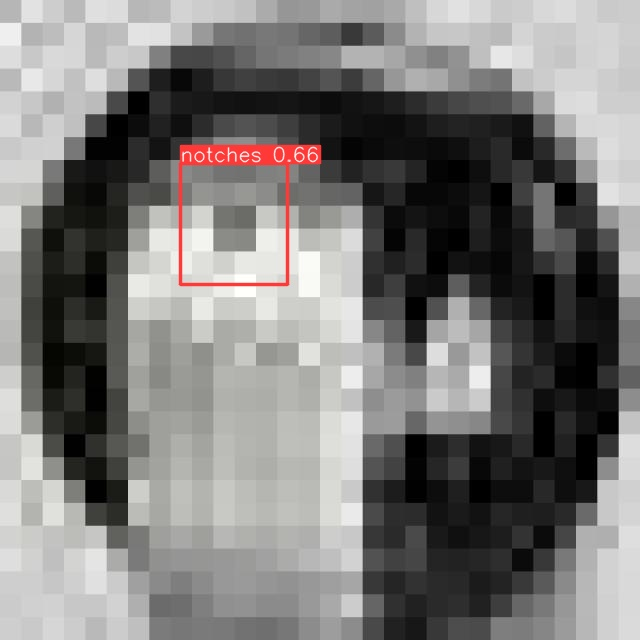

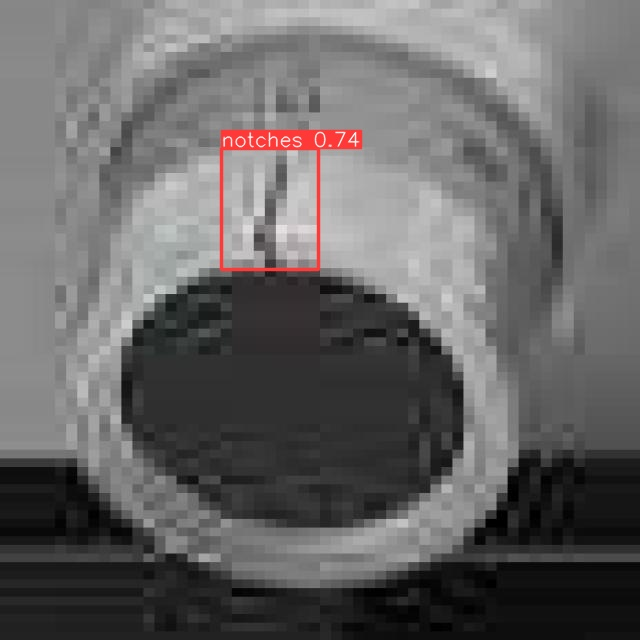

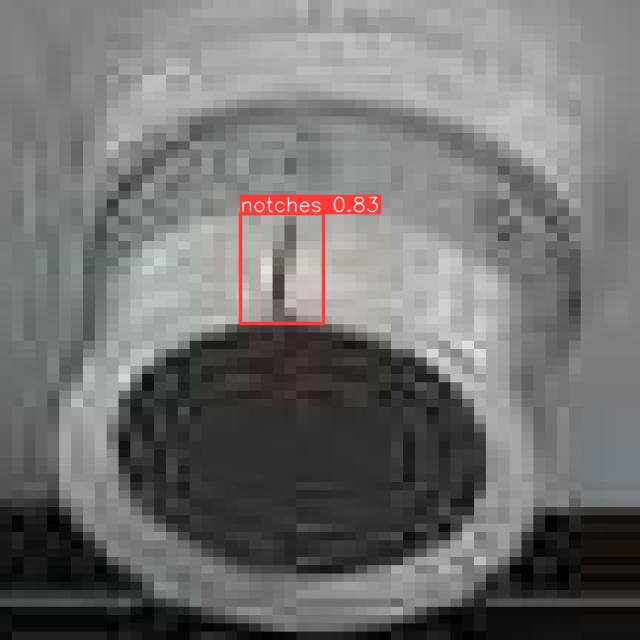

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
# import math
# import cv2

# def calculate_degree(image, annotations):
#     height, width, _ = image.shape
#     center_x, center_y = width // 2, height // 2

#     degrees = []
#     for annotation in annotations:
#         # Extract notch coordinates from annotation
#         notch_x, notch_y = annotation['x'], annotation['y']

#         # Calculate the angle relative to the center
#         angle = math.atan2(notch_y - center_y, notch_x - center_x)
#         degree = math.degrees(angle)

#         if degree < 0:
#             degree += 360

#         # Adjust the degree to account for the image's orientation
#         degree = (degree + 270) % 360

#         degrees.append(degree)

#     return degrees

In [ ]:
print(dir(dataset))  # This will print all attributes and methods of the dataset object


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'location', 'model_format', 'name', 'version']


In [ ]:
######### GET BOUNDİNG BOX COORDINATES

from pathlib import Path

# Load the model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Make predictions
predictions = model('/content/runs/detect/predict', save_txt=None)

# Create labels directory if it doesn't exist
labels_dir = Path("/content/runs/detect/labels")
labels_dir.mkdir(parents=True, exist_ok=True)

# Loop through each image in predictions
for prediction in predictions:
    image_path = Path(prediction.path)
    label_path = labels_dir / f"{image_path.stem}.txt"

    try:
        # Write the first bounding box to the label file
        if len(prediction.boxes) > 0:
            box = prediction.boxes.xywhn[0]
            cls = int(prediction.boxes.cls[0].item())
            x, y, w, h = box.tolist()
            with open(label_path, 'w') as file:
                file.write(f"{cls} {x} {y} {w} {h}\n")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

print("Label files created successfully.")



image 1/28 /content/runs/detect/predict/03KYBAZ5G36O_button_1_png.rf.671430cebe37c4171ff7e80b3c099ed8.jpg: 800x800 (no detections), 58.5ms
image 2/28 /content/runs/detect/predict/03QCPN4ZBGA6_button_2_png.rf.f2a59558c252577137134ed223998f2d.jpg: 800x800 4 notchess, 56.9ms
image 3/28 /content/runs/detect/predict/0YHXQISNXVGN_button_3_png.rf.0b40e823ca73130ec9adfe78fdb40a49.jpg: 800x800 1 notches, 57.0ms
image 4/28 /content/runs/detect/predict/1OPGT9WKJMNJ_button_2_png.rf.89024192cecac1076e1375c68036a055.jpg: 800x800 1 notches, 34.2ms
image 5/28 /content/runs/detect/predict/2559B8K247J5_button_2_png.rf.63e56cd8b3f52406ca9bcfcd17f82d14.jpg: 800x800 (no detections), 33.3ms
image 6/28 /content/runs/detect/predict/4K20C0BNTUQB_button_2_png.rf.89858a1612e48843234d08c86980de64.jpg: 800x800 (no detections), 33.6ms
image 7/28 /content/runs/detect/predict/51Z8BMYF1BMO_button_3_png.rf.53d0ff3ea0ee4e17c79267944d6f58cb.jpg: 800x800 1 notches, 33.8ms
image 8/28 /content/runs/detect/predict/5H5S6GS51

Label files created successfully.


In [ ]:
import cv2
import os
import math

def load_annotations(label_path):
    annotations = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            # Assuming label format: class x_center y_center width height
            # Convert from YOLO format to absolute coordinates (x, y)
            x, y = float(parts[1]), float(parts[2])
            annotations.append((x, y))
    return annotations

In [ ]:
import math

def calculate_degree(image, annotations):
    height, width, _ = image.shape
    center_x, center_y = width // 2, height // 2

    degrees = []
    for (x, y) in annotations:
        # Convert relative to absolute coordinates
        notch_x, notch_y = x * width, y * height

        # Calculate the angle relative to the center
        angle = math.atan2(notch_y - center_y, notch_x - center_x)
        degree = math.degrees(angle)

        if degree < 0:
            degree += 360

        # Adjust degree for image orientation
        degree = (degree + 90) % 360
        formatted_value = f"{degree:.3f}"
        degrees.append(formatted_value)

    return degrees


In [ ]:
# # Process each image in the dataset
# results = {}
# for image_info in dataset.images:
#     # Load the image using OpenCV
#     image = cv2.imread(image_info.filepath)

#     # Extract annotations for notches
#     notch_annotations = []
#     for obj in image_info.annotations:
#         x, y = obj['x'], obj['y']  # Replace with the correct keys if different
#         notch_annotations.append((x, y))

#     # Calculate the degrees of notches
#     degrees = calculate_degree(image, notch_annotations)

#     # Store results
#     results[image_info.filepath] = degrees

# # Example of outputting the results
# for filepath, degrees in results.items():
#     print(f'File: {filepath}, Degrees of Notches: {degrees}')


In [ ]:
# TRAINED IMAGES VERSION
# Path to your dataset
dataset_path = '/content/Notch-Detection-on-Oven-Buttons-3'
train_images_path = os.path.join(dataset_path, 'train', 'images')
train_labels_path = os.path.join(dataset_path, 'train', 'labels')

# Process each image in the training set
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  # Check for image files
        image_path = os.path.join(train_images_path, filename)
        label_path = os.path.join(train_labels_path, filename.replace('.jpg', '.txt'))

        image = cv2.imread(image_path)
        annotations = load_annotations(label_path)
        degrees = calculate_degree(image, annotations)

        print(f'File: {filename}, Degrees of Notches: {degrees}')



# # PREDICTED IMAGES VERSION
# # Path to your dataset
# dataset_path = '/content'
# train_images_path = os.path.join(dataset_path, 'runs/detect', 'predict')
# train_labels_path = os.path.join(dataset_path, 'runs/detect', 'labels')

# # Process each image in the training set
# for filename in os.listdir(train_images_path):
#     if filename.endswith('.jpg'):  # Check for image files
#         image_path = os.path.join(train_images_path, filename)
#         label_path = os.path.join(train_labels_path, filename.replace('.jpg', '.txt'))

#         image = cv2.imread(image_path)
#         annotations = load_annotations(label_path)
#         degrees = calculate_degree(image, annotations)

#         print(f'File: {filename}, Degrees of Notches: {degrees}')

File: O9BKCA5RUP9L_button_2_png.rf.3e9c67497fa31466309467495b7de4b2.jpg, Degrees of Notches: ['28.301']
File: 51Z8BMYF1BMO_button_2_png.rf.a23ff6daaba2a43b91350a2a55b427b6.jpg, Degrees of Notches: ['68.445']
File: 2559B8K247J5_button_1_png.rf.e5739781a7121da5d4218d74ef697703.jpg, Degrees of Notches: ['259.439']
File: 90FOJNOM3GM1_button_2_png.rf.ac986b35c44df3fafe4e869b174ae493.jpg, Degrees of Notches: ['286.803']
File: 03QCPN4ZBGA6_button_3_png.rf.34ec02cccfeb91e838fd3a6a36a22ded.jpg, Degrees of Notches: ['344.635']
File: A7MM0YW1KCAM_button_1_png.rf.08a4894b684bf0dbedd6323d3fccf961.jpg, Degrees of Notches: ['24.305']
File: O9BKCA5RUP9L_button_5_png.rf.bf5d71a3e1f3d2300343bfcc141cbad5.jpg, Degrees of Notches: ['296.232']
File: 0YHXQISNXVGN_button_6_png.rf.7002ba96015bcb97ee39b1b6ee0d3584.jpg, Degrees of Notches: ['32.800']
File: 51Z8BMYF1BMO_button_2_png.rf.6cc88eb89a54639aa8eb29090110bbd8.jpg, Degrees of Notches: ['74.745']
File: 03QCPN4ZBGA6_button_1_png.rf.7ba169a1645d8fcccb61f5959

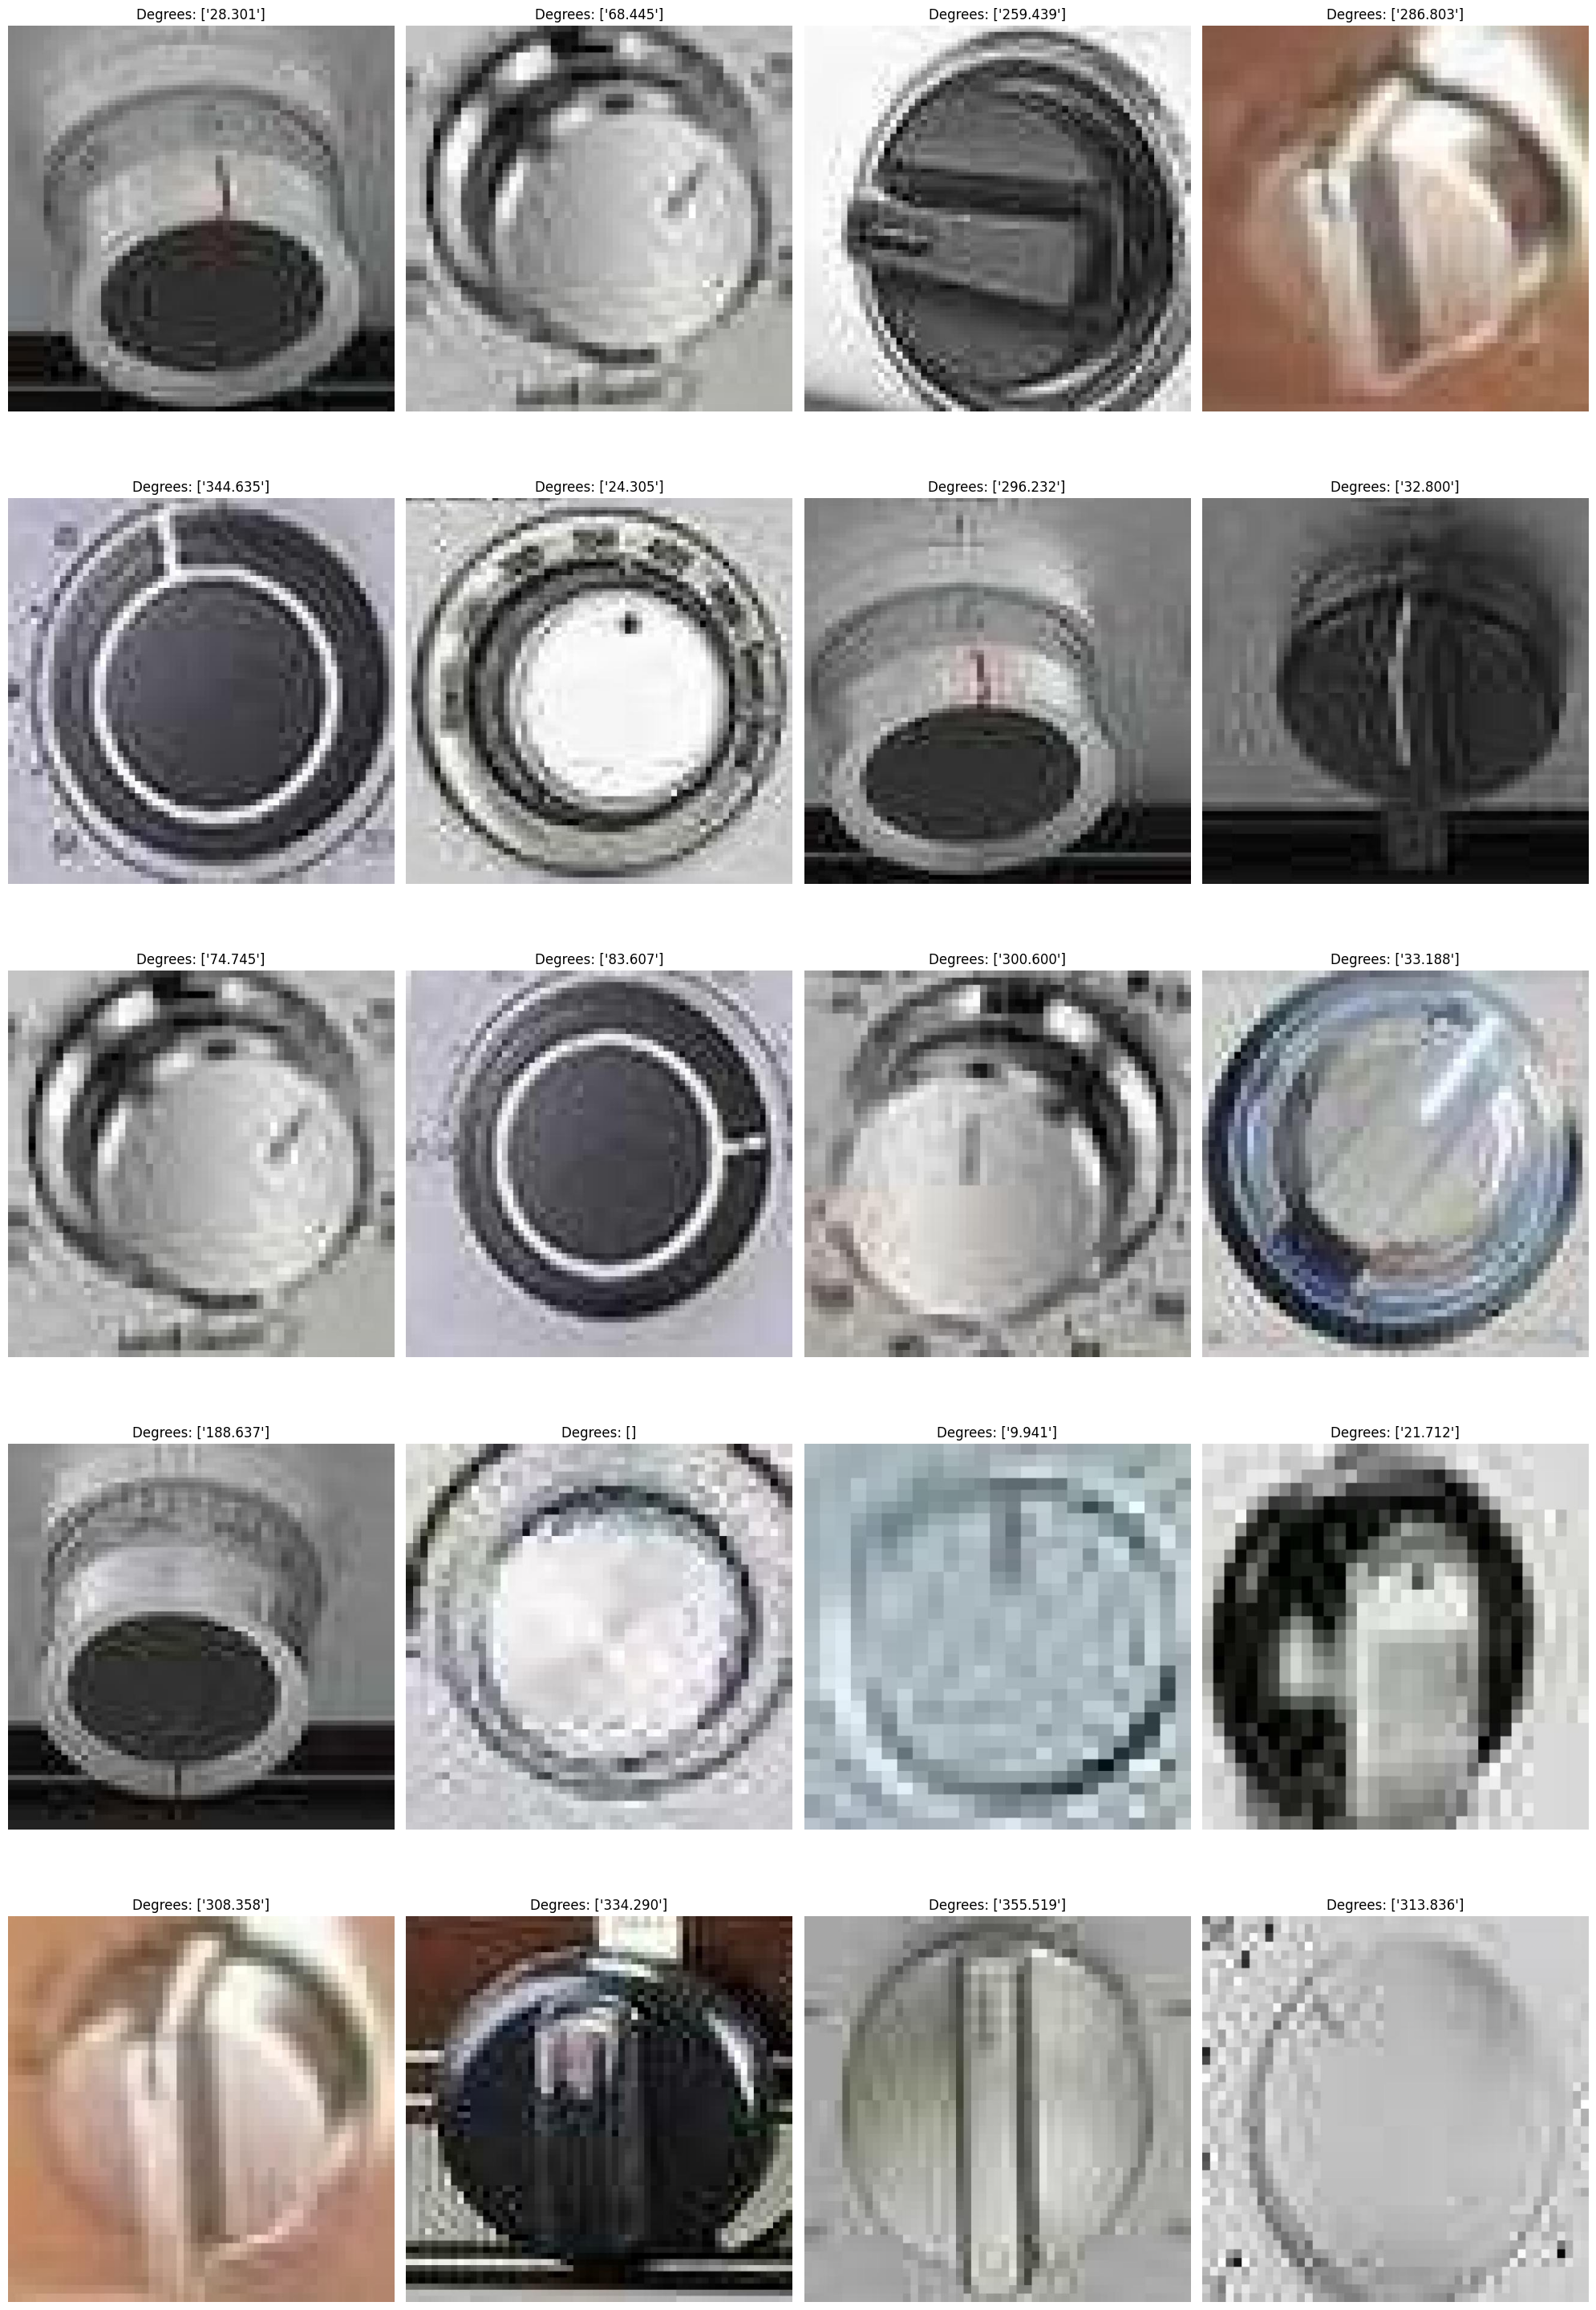

In [ ]:
import matplotlib.pyplot as plt

# Setup matplotlib figure
fig, axes = plt.subplots(5, 4, figsize=(20, 30))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Process and display only the first 10 images
count = 0
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg') and count < 20:  # Check for image files and limit to 10
        image_path = os.path.join(train_images_path, filename)
        label_path = os.path.join(train_labels_path, filename.replace('.jpg', '.txt'))

        image = cv2.imread(image_path)
        annotations = load_annotations(label_path)
        degrees = calculate_degree(image, annotations)

        # Display image and degrees
        ax = axes[count]
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct coloring
        ax.axis('off')  # Hide axes
        ax.set_title(f'Degrees: {degrees}')

        count += 1

plt.tight_layout()
plt.show()